In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

In [15]:
#load image
A = Image.open('/home/topher/Documents/MATH3204/Assignment_1/image.jpg')

print(f"The original image is in {A.format} format.")
print(f"The original image has {A.mode} mode.")
print(f"The original image has {A.size} size, or {A.size[0]*A.size[1]}x3 matrix entries.")
print("We have multiplied the matrix entries by three because of the RGB format.")
print(f"This represents {A.size[0]*A.size[1]*3*4} bytes")


The original image is in JPEG format.
The original image has RGB mode.
The original image has (1920, 650) size, or 1248000x3 matrix entries.
We have multiplied the matrix entries by three because of the RGB format.
This represents 14976000 bytes


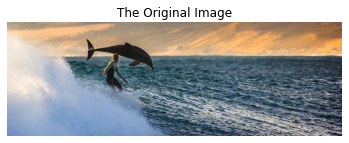

In [16]:
img = plt.imshow(A)
plt.axis('off')
plt.title('The Original Image')
plt.show()

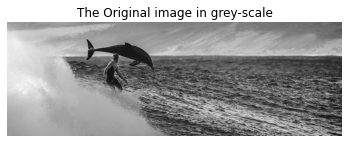

This grey scale image is a matrix with 1248000 entries.
Each entry is an integer, so each require 4 bytes. In total, the storage required is 4992000 bytes.

We will now truncate using SVD. The storage required as a function of r is given by ((m + n + 1)*r)*4
With rank = 2, we now require ((650+1920+1)*2)*4 = 20568 bytes.


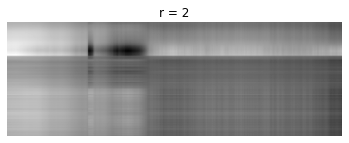

With rank = 4, we now require ((650+1920+1)*4)*4 = 41136 bytes.


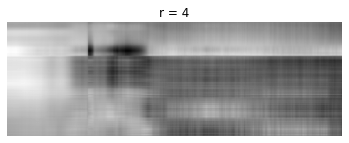

With rank = 16, we now require ((650+1920+1)*16)*4 = 164544 bytes.


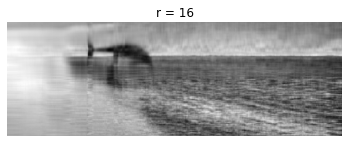

With rank = 32, we now require ((650+1920+1)*32)*4 = 329088 bytes.


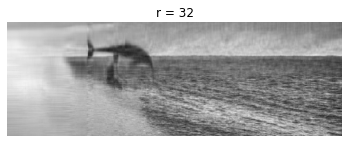

With rank = 64, we now require ((650+1920+1)*64)*4 = 658176 bytes.


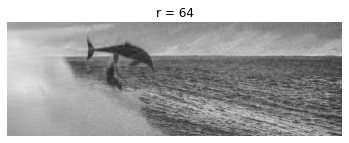

In [19]:
X = np.mean(A, -1)
m = X.shape[0]
n = X.shape[1]

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('The Original image in grey-scale')
plt.show()
print(f"This grey scale image is a matrix with {X.size} entries.")
print(f"Each entry is an integer, so each require 4 bytes. In total, the storage required is {X.size*4} bytes.")
print()
print("We will now truncate using SVD. The storage required as a function of r is given by ((m + n + 1)*r)*4")

U, S, VT = np.linalg.svd(X, full_matrices=False)

S = np.diag(S)

i = 1

ranks = [2, 4, 16, 32, 64]

for r in ranks:
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(i)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f'r = {str(r)}')
    print(f"With rank = {str(r)}, we now require (({m}+{n}+1)*{r})*4 = {((m+n+1)*r)*4} bytes.")
    plt.show()
    i += 1

## Part (c)

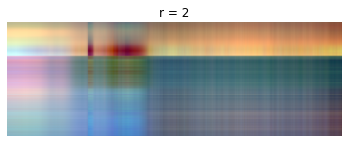

With rank = 2, we now require ((650+1920+1)*2)*4*3 = 61704 bytes.


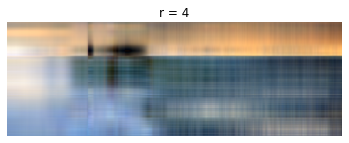

With rank = 4, we now require ((650+1920+1)*4)*4*3 = 123408 bytes.


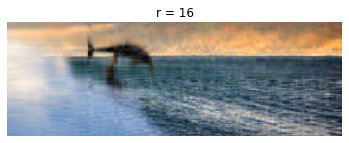

With rank = 16, we now require ((650+1920+1)*16)*4*3 = 493632 bytes.


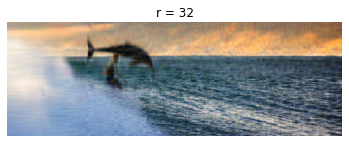

With rank = 32, we now require ((650+1920+1)*32)*4*3 = 987264 bytes.


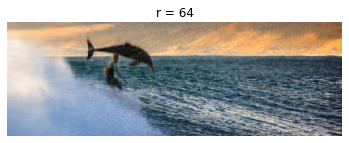

With rank = 64, we now require ((650+1920+1)*64)*4*3 = 1974528 bytes.


In [18]:
Xr = np.array(A)[:, :, 0]
Xg = np.array(A)[:, :, 1]
Xb = np.array(A)[:, :, 2]

Ur, Sr, VTr = np.linalg.svd(Xr, full_matrices=False)
Ug, Sg, VTg = np.linalg.svd(Xg, full_matrices=False)
Ub, Sb, VTb = np.linalg.svd(Xb, full_matrices=False)

i = 1

ranks = [2, 4, 16, 32, 64]

for r in ranks:
    Xr_approx = np.array(np.matrix(Ur[:, :r]) * np.diag(Sr[:r]) * np.matrix(VTr[:r, :]))
    Xg_approx = np.array(np.matrix(Ug[:, :r]) * np.diag(Sg[:r]) * np.matrix(VTg[:r, :]))
    Xb_approx = np.array(np.matrix(Ub[:, :r]) * np.diag(Sb[:r]) * np.matrix(VTb[:r, :]))

    colour_approx = np.dstack((Xr_approx, Xg_approx, Xb_approx))

    for ind1, row in enumerate(colour_approx):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    colour_approx[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    colour_approx[ind1, ind2, ind3] = 255

    approx_image = colour_approx.astype(np.uint8)

    img = plt.imshow(approx_image)
    # plt.figure(i)
    plt.axis('off')
    plt.title(f'r = {str(r)}')
    print(f"With rank = {str(r)}, we now require (({m}+{n}+1)*{r})*4*3 = {((m+n+1)*r)*4*3} bytes.")
    plt.show()
    i += 1